In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [4]:
u = torch.arange(0, 10, 0.001)
idx = np.random.choice(range(len(u)), 400, replace=False)

a = torch.FloatTensor([0.5])
sigma = torch.randn(len(idx)) * 0.5


f = lambda w, t: (1 - w) * t + w

t_train = u[idx[0:200]]
y_gt_train = f(a, t_train)
x_train = y_gt_train + sigma[0:200]

t_val = u[idx[200:]]
y_gt_val = f(a, t_val)
x_val = y_gt_val + sigma[200:]


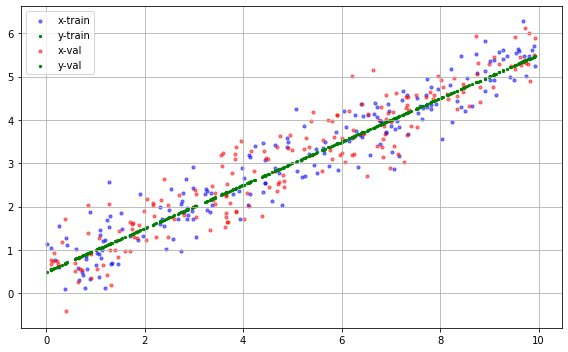

In [5]:
plt.figure(figsize=(8, 5))

plt.scatter(t_train, x_train, s=10, label="x-train", color="blue", alpha=0.5)
plt.scatter(t_train, y_gt_train, s=5, label="y-train", color="green")

plt.scatter(t_val, x_val, s=10, label="x-val", color="red", alpha=0.5)
plt.scatter(t_val, y_gt_val, s=5, label="y-val", color="green")
plt.legend()
plt.grid()
plt.tight_layout()

[0/120] train-loss: 65.89315032958984, a_pred: 2.142791986465454
[0/120] val-loss: 18.170347213745117, a_pred: 1.3849018812179565
[10/120] train-loss: 26.7437744140625, a_pred: 1.5465832948684692
[10/120] val-loss: 1.9991400241851807, a_pred: 0.7935182452201843
[20/120] train-loss: 6.466005325317383, a_pred: 1.0146126747131348
[20/120] val-loss: 1.1911309957504272, a_pred: 0.27343475818634033
[30/120] train-loss: 0.363566517829895, a_pred: 0.6220265626907349
[30/120] val-loss: 8.371500015258789, a_pred: -0.10064128786325455
[40/120] train-loss: 0.16619527339935303, a_pred: 0.41749662160873413
[40/120] val-loss: 14.32925796508789, a_pred: -0.28582409024238586
[50/120] train-loss: 0.35775795578956604, a_pred: 0.37895214557647705
[50/120] val-loss: 15.282641410827637, a_pred: -0.3115452527999878
[60/120] train-loss: 0.12546297907829285, a_pred: 0.4283163845539093
[60/120] val-loss: 13.341988563537598, a_pred: -0.2582697570323944
[70/120] train-loss: 0.0037400859873741865, a_pred: 0.487623

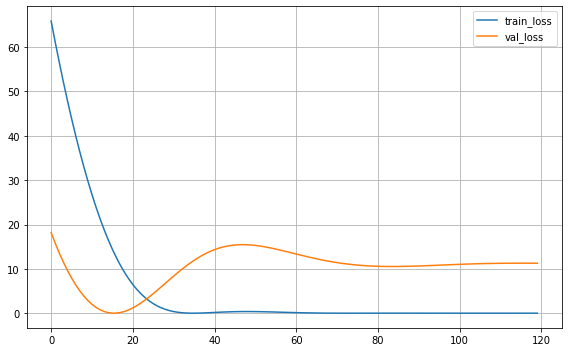

In [52]:
model = nn.Linear(200, 1)
criterion = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.0)

N = 120
losses_train = []
losses_val = []

for epoch in range(N):
    model.train()
    a_pred = model(x_train)
    loss = criterion(f(a_pred, t_train), y_gt_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    losses_train.append(loss.item())
    if epoch % 10 == 0:
        print("[{}/{}] train-loss: {}, a_pred: {}".format(epoch, N, loss.item(), a_pred.item()))
        
    model.eval()
    a_pred = model(x_val)
    loss = criterion(f(a_pred, t_val), y_gt_val)
    losses_val.append(loss.item())
    if epoch % 10 == 0:
        print("[{}/{}] val-loss: {}, a_pred: {}".format(epoch, N, loss.item(), a_pred.item()))

plt.figure(figsize=(8, 5))
plt.plot(range(len(losses_train)), losses_train, label="train_loss")
plt.plot(range(len(losses_val)), losses_val, label="val_loss")
plt.legend()
plt.grid()
plt.tight_layout()

[0/120] train-loss: 116.03878784179688, a_pred: -1.6800379753112793
[0/120] val-loss: 117.97439575195312, a_pred: -1.7547967433929443
[10/120] train-loss: 61.018367767333984, a_pred: -1.080857515335083
[10/120] val-loss: 63.896934509277344, a_pred: -1.1594092845916748
[20/120] train-loss: 25.6090145111084, a_pred: -0.5241388082504272
[20/120] val-loss: 28.636022567749023, a_pred: -0.6108871102333069
[30/120] train-loss: 7.557157039642334, a_pred: -0.05634173005819321
[30/120] val-loss: 9.972148895263672, a_pred: -0.15555307269096375
[40/120] train-loss: 1.1369657516479492, a_pred: 0.2842075526714325
[40/120] val-loss: 2.5238120555877686, a_pred: 0.17020656168460846
[50/120] train-loss: 0.005431520286947489, a_pred: 0.48508504033088684
[50/120] val-loss: 0.4727321267127991, a_pred: 0.3572680950164795
[60/120] train-loss: 0.10916399210691452, a_pred: 0.5668655037879944
[60/120] val-loss: 0.11665370315313339, a_pred: 0.42909732460975647
[70/120] train-loss: 0.12608981132507324, a_pred: 0.

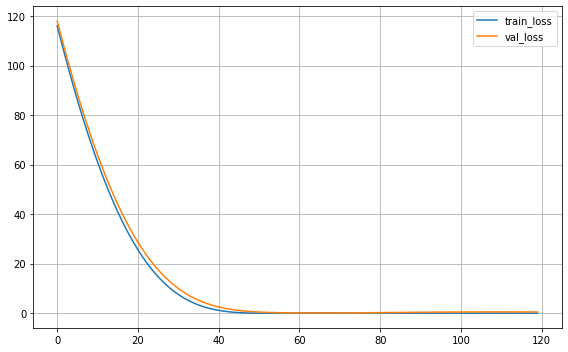

In [57]:
model = nn.Linear(200, 1)
criterion = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.0001)

N = 120
losses_train = []
losses_val = []

for epoch in range(N):
    model.train()
    a_pred = model(x_train)
    loss = criterion(f(a_pred, t_train), y_gt_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    losses_train.append(loss.item())
    if epoch % 10 == 0:
        print("[{}/{}] train-loss: {}, a_pred: {}".format(epoch, N, loss.item(), a_pred.item()))
        
    model.eval()
    a_pred = model(x_val)
    loss = criterion(f(a_pred, t_val), y_gt_val)
    losses_val.append(loss.item())
    if epoch % 10 == 0:
        print("[{}/{}] val-loss: {}, a_pred: {}".format(epoch, N, loss.item(), a_pred.item()))
        
plt.figure(figsize=(8, 5))
plt.plot(range(len(losses_train)), losses_train, label="train_loss")
plt.plot(range(len(losses_val)), losses_val, label="val_loss")
plt.legend()
plt.grid()
plt.tight_layout()

[0/120] train-loss: 168.28761291503906, a_pred: -2.1253578662872314
[0/120] val-loss: 1.4933792352676392, a_pred: 0.7536872029304504
[10/120] train-loss: 31.418241500854492, a_pred: 1.6343663930892944
[10/120] val-loss: 254.7360382080078, a_pred: 3.813284158706665
[20/120] train-loss: 7.383901596069336, a_pred: -0.04992743209004402
[20/120] val-loss: 64.7325210571289, a_pred: 2.170224189758301
[30/120] train-loss: 0.8280879259109497, a_pred: 0.6841622591018677
[30/120] val-loss: 148.3873748779297, a_pred: 3.028785467147827
[40/120] train-loss: 0.023251881822943687, a_pred: 0.46914026141166687
[40/120] val-loss: 109.65763854980469, a_pred: 2.6738667488098145
[50/120] train-loss: 0.0023920247331261635, a_pred: 0.49010205268859863
[50/120] val-loss: 122.86792755126953, a_pred: 2.8010857105255127
[60/120] train-loss: 0.0025062633212655783, a_pred: 0.5101315379142761
[60/120] val-loss: 117.52743530273438, a_pred: 2.750521421432495
[70/120] train-loss: 4.46737467427738e-05, a_pred: 0.4986473

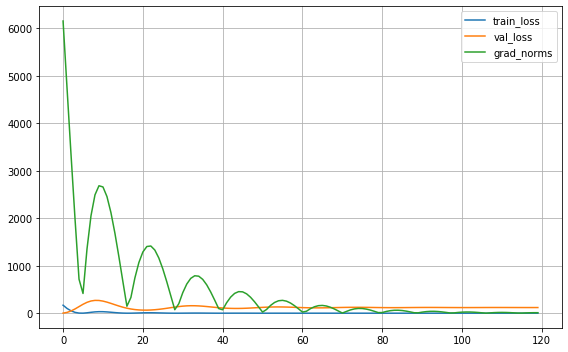

In [71]:
def calc_grad_norm(parameters):
    if isinstance(parameters, torch.Tensor):
        parameters = [parameters]
    parameters = list(filter(lambda p: p.grad is not None, parameters))
    total_norm = torch.norm(torch.stack([torch.norm(p.grad.detach(), 2) for p in parameters]), 2)
    return total_norm

model = nn.Linear(200, 1)
criterion = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.)

N = 120
losses_train = []
losses_val = []
grad_norms = []

for epoch in range(N):
    model.train()
    a_pred = model(x_train)
    loss = criterion(f(a_pred, t_train), y_gt_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    losses_train.append(loss.item())
    if epoch % 10 == 0:
        print("[{}/{}] train-loss: {}, a_pred: {}".format(epoch, N, loss.item(), a_pred.item()))
    
    grad_norms.append(calc_grad_norm(model.parameters()))
    
    model.eval()
    a_pred = model(x_val)
    loss = criterion(f(a_pred, t_val), y_gt_val)
    losses_val.append(loss.item())
    if epoch % 10 == 0:
        print("[{}/{}] val-loss: {}, a_pred: {}".format(epoch, N, loss.item(), a_pred.item()))
        
plt.figure(figsize=(8, 5))
plt.plot(range(len(losses_train)), losses_train, label="train_loss")
plt.plot(range(len(losses_val)), losses_val, label="val_loss")
plt.plot(range(len(grad_norms)), grad_norms, label="grad_norms")
plt.legend()
plt.grid()
plt.tight_layout()


In [11]:
f = lambda w: (1 - w) * t**2 + 10.*torch.sin(w*t*2.)

y_gt = f(a)
x = y_gt + sigma

print(len(x))

200


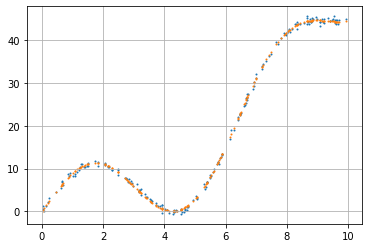

In [12]:
plt.scatter(t, x, s=1)
plt.scatter(t, y_gt, s=1)
plt.grid()

In [7]:
model = nn.Sequential(nn.Linear(200, 2), nn.ReLU(), nn.Linear(2, 1))
criterion = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.)

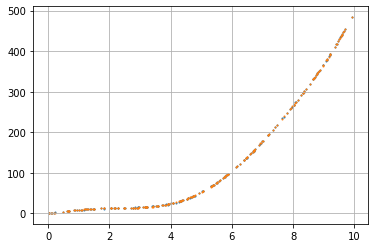

In [8]:
N = 200
losses = []
for epoch in range(N):
    a_pred = model(x)
    loss = criterion(f(a_pred), y_gt)
    optim.zero_grad()
    loss.backward()
    optim.step()
    losses.append(loss.item())
    if epoch % 10 == 0:
        print("[{}/{}] loss: {}, a_pred: {}".format(epoch, N, loss.item(), a_pred.item()))

[0/5000] loss: 218962.125, a_pred: -9.90003776550293
[100/5000] loss: 0.09097721427679062, a_pred: 0.5024994611740112
[200/5000] loss: 1.9176898149453336e-06, a_pred: 0.49998849630355835
[300/5000] loss: 1.7907417215745625e-10, a_pred: 0.5000001192092896
[400/5000] loss: 0.0, a_pred: 0.5
[500/5000] loss: 0.0, a_pred: 0.5
[600/5000] loss: 0.0, a_pred: 0.5
[700/5000] loss: 0.0, a_pred: 0.5
[800/5000] loss: 0.0, a_pred: 0.5
[900/5000] loss: 0.0, a_pred: 0.5
[1000/5000] loss: 0.0, a_pred: 0.5
[1100/5000] loss: 0.0, a_pred: 0.5
[1200/5000] loss: 0.0, a_pred: 0.5
[1300/5000] loss: 0.0, a_pred: 0.5
[1400/5000] loss: 0.0, a_pred: 0.5
[1500/5000] loss: 0.0, a_pred: 0.5
[1600/5000] loss: 0.0, a_pred: 0.5
[1700/5000] loss: 0.0, a_pred: 0.5
[1800/5000] loss: 0.0, a_pred: 0.5
[1900/5000] loss: 0.0, a_pred: 0.5
[2000/5000] loss: 0.0, a_pred: 0.5
[2100/5000] loss: 0.0, a_pred: 0.5
[2200/5000] loss: 0.0, a_pred: 0.5
[2300/5000] loss: 0.0, a_pred: 0.5
[2400/5000] loss: 0.0, a_pred: 0.5
[2500/5000] loss